<a href="https://colab.research.google.com/github/kaimakov-rk/kokoko/blob/master/Copy_of_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [3]:
df = pd.read_csv("/content/predictive_maintenance.csv")
df.columns.tolist() # четать файл

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [4]:
namey = "Failure Type"
df[namey] = df[[namey]].astype("category")

In [5]:
namex = "Process temperature [K]"
describe =  df[[namex]].describe(include='all')
describe # ваш код здесь


,Process temperature [K]
count,10000.000000
mean,310.005560
std,1.483734
min,305.700000
25%,308.800000
50%,310.100000
75%,311.100000
max,313.800000


In [6]:
mean = df.groupby([namey])[[namex]].mean() # (среднее) ваш код здесь
mean

,Process temperature [K]
Failure Type,
Heat Dissipation Failure,310.799107
No Failure,309.994343
Overstrain Failure,310.051282
Power Failure,309.954737
Random Failures,310.755556
Tool Wear Failure,310.164444


In [7]:
median = df.groupby([namey])[[namex]].median() # (медиана) ваш код здесь
median

,Process temperature [K]
Failure Type,
Heat Dissipation Failure,310.7
No Failure,310.0
Overstrain Failure,310.1
Power Failure,310.2
Random Failures,311.1
Tool Wear Failure,310.3


In [8]:
mode = df.groupby([namey])[namex].apply(pd.Series.mode) # (мода) ваш код здесь
mode

Failure Type               
Heat Dissipation Failure  0    310.4
No Failure                0    310.6
Overstrain Failure        0    309.8
                          1    311.8
Power Failure             0    308.7
                          1    310.2
Random Failures           0    311.9
                          1    312.1
Tool Wear Failure         0    310.9
Name: Process temperature [K], dtype: float64

In [9]:
min = df.groupby([namey])[[namex]].min() # (минимум) ваш код здесь
min

,Process temperature [K]
Failure Type,
Heat Dissipation Failure,309.4
No Failure,305.7
Overstrain Failure,306.1
Power Failure,306.2
Random Failures,307.7
Tool Wear Failure,307.4


In [10]:
max = df.groupby([namey])[[namex]].max() # (максимум) ваш код здесь
max

,Process temperature [K]
Failure Type,
Heat Dissipation Failure,312.2
No Failure,313.8
Overstrain Failure,313.1
Power Failure,313.2
Random Failures,312.5
Tool Wear Failure,313.7


In [11]:
std = df.groupby([namey])[[namex]].std() # (стандартное отклонение) Ваш код здесь
std

,Process temperature [K]
Failure Type,
Heat Dissipation Failure,0.644938
No Failure,1.486268
Overstrain Failure,1.552940
Power Failure,1.600450
Random Failures,1.501459
Tool Wear Failure,1.500781


Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [12]:
q1 = float(describe.loc["25%"]) # (25% квантиль) ваш код здесь
q1

308.8

In [13]:
q2 = float(describe.loc["50%"]) # (50% квантиль) ваш код здесь
q2

310.1

In [14]:
q3 = float(describe.loc["75%"]) # (75% квантиль) ваш код здесь
q3

311.1

In [15]:
iqr = float(q3 - q1) # (интерквартильный размах) ваш код здесь
iqr

2.3000000000000114

Какие выводы можно сделать исходя из полученных статистических данных?


**Ответ здесь**

```
Разброс средних 50% значений температуры составляет 2.3 Кельвина.
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

array([[<Axes: title={'center': 'Heat Dissipation Failure'}>,
        <Axes: title={'center': 'No Failure'}>],
       [<Axes: title={'center': 'Overstrain Failure'}>,
        <Axes: title={'center': 'Power Failure'}>],
       [<Axes: title={'center': 'Random Failures'}>,
        <Axes: title={'center': 'Tool Wear Failure'}>]], dtype=object)

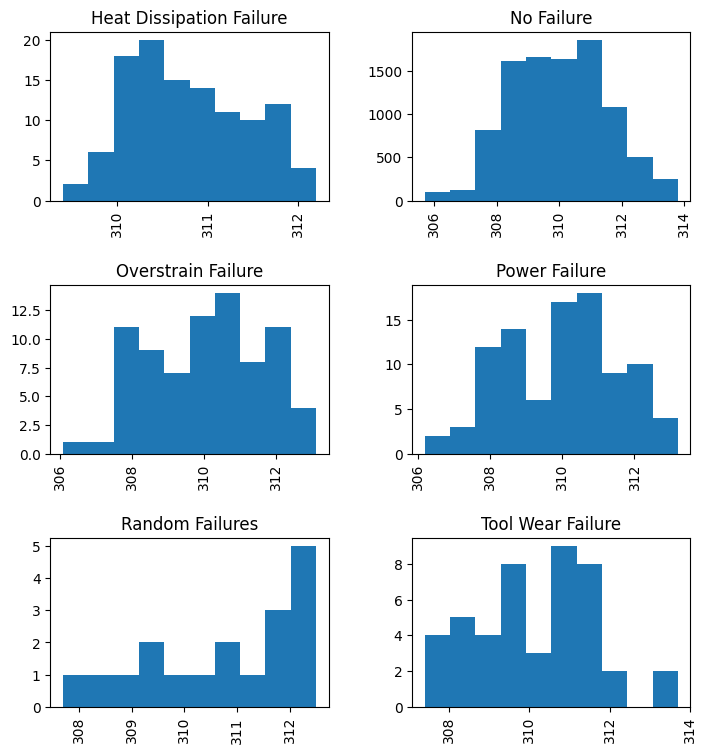

In [16]:
df.hist(namex, by=namey, figsize=(8,9))

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

<Axes: >

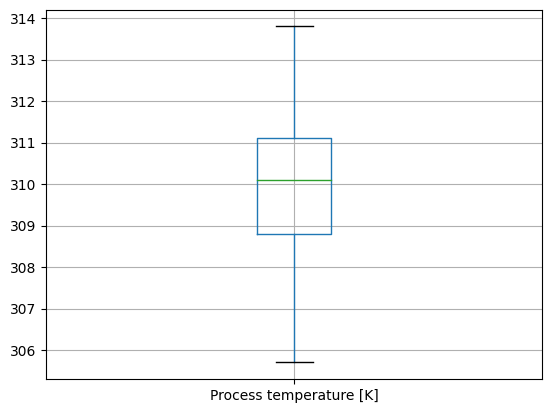

In [17]:
df.boxplot(column=[namex])

<Axes: title={'center': 'Process temperature [K]'}, xlabel='Failure Type'>

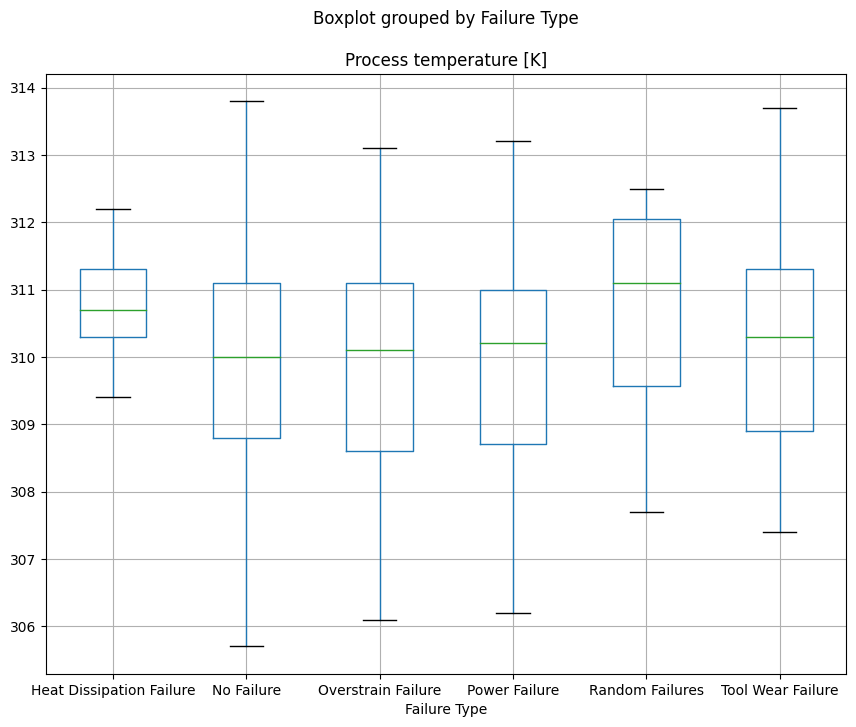

In [18]:
df.boxplot(column=[namex], by=namey, figsize=(10, 8))

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

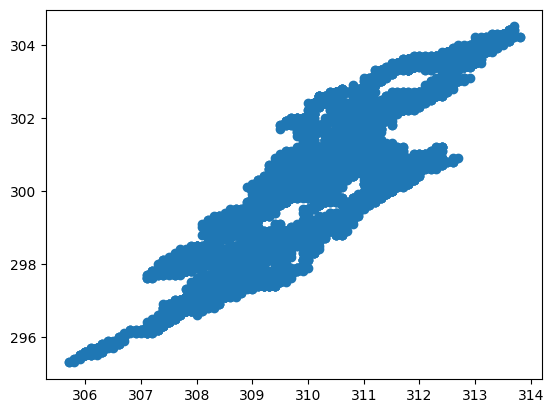

In [19]:
column_names = ['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']
namez = column_names[3]
plt.scatter(df[namex], df[namez])

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

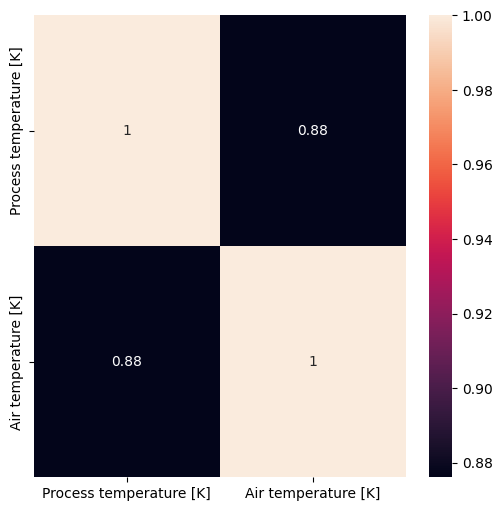

In [20]:
corr_matrix = df[[namex, namez]].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**

У температуры процесса очень высокая корреляция с температурой процесса. У температуры воздуха корреляция с температурой процесса также высокая.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [76]:
from typing import TypeAlias, Text
from math import erfc
from sklearn.cluster import DBSCAN


DataFrame: TypeAlias = pd.core.frame.DataFrame


class OutlierCleanser:
  def __init__(self, df: DataFrame):
    self.__df = df.copy()

  @property
  def df(self):
    return self.__df

  def clean_by_std_and_mean(self, column_name: Text) -> DataFrame:
    df: DataFrame = self.__df
    mean: float = df[column_name].mean()
    std: float = df[column_name].std()
    return df[df.apply(lambda x: abs(x - mean) < 2 * std,
                               axis=1, result_type='reduce')].dropna()

  def clean_by_chauvenet(self, column_name: Text) -> DataFrame:
    df: DataFrame = self.__df
    iteration: int = 0
    n: int = len(df[column_name])
    while n > 1:
      mean: float = df[column_name].mean()
      std: float = df[column_name].std()
      to_drop: list = list()
      for i, x in enumerate(df[column_name]):
        if std > 0.0 and erfc((abs(x - mean) / 2**0.5) / std) < 1.0/(2*n):
          to_drop += [i, ]
      df = df.drop(to_drop)
      new_n: int = len(df[column_name])
      if new_n < n:
        n = new_n
        iteration += 1
      else:
        return df

  def clean_by_quartiles(self, column_name: Text) -> DataFrame:
    df: DataFrame = self.__df
    q1: float = df[column_name].quantile(0.25)
    q3: float = df[column_name].quantile(0.75)
    iqr: float = q3 - q1
    df = df[q1 - 1.5 * iqr <= df[column_name]]
    df = df[df[column_name] <= q3 + 1.5 * iqr]
    return df

  def clean_by_2_variables_1_dataframe(self,
                                       column_name_1: Text,
                                       column_name_2: Text,
                                       eps: float = 1.0) -> DataFrame:
    df: DataFrame = self.__df
    pairs = list()
    for index, row in df.iterrows():
      pairs.append([row[column_name_1], row[column_name_2]])
    clustering = DBSCAN(eps=eps, min_samples=1).fit(pairs)

    clusters_count = dict()
    for elem in clustering.labels_:
      if elem in clusters_count.keys():
        clusters_count[elem] += 1
      else:
        clusters_count[elem] = 1

    outlier_threshold = 2
    outliers = list(filter(lambda ivp: clusters_count[ivp[1]] <= outlier_threshold,
                           enumerate(clustering.labels_)))
    return df.drop(map(lambda ivp: ivp[0], outliers))




In [79]:
# @title Driver code { run: "auto", vertical-output: true }
method_name = "clean_by_chauvenet" # @param ["clean_by_std_and_mean", "clean_by_chauvenet", "clean_by_quartiles", "clean_by_2_variables_1_dataframe"]
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

oc = OutlierCleanser(data)

# Было:
# oc.__getattribute__(method)(*args)

# Стало:
target_column = 'col1'
target_columns = ('col1', 'col2')
match method_name:
  case "clean_by_std_and_mean":
    print(oc.clean_by_std_and_mean(target_column))
  case "clean_by_chauvenet":
    print(oc.clean_by_chauvenet(target_column))
  case "clean_by_quartiles":
    print(oc.clean_by_quartiles(target_column))
  case "clean_by_2_variables_1_dataframe":
    print(oc.clean_by_2_variables_1_dataframe(*target_columns, eps=5))
  case _:
    print("Ошибка! Обратитесь к системному администратору")


   col1  col2
0     1     1
1     2     2
2     3     3
3     4     2
4     5     1


### Пример реализации одного метода

In [23]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [24]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]